# Exploratory Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
    
    In between this notebook, and the first, I cleaned the data further in Excel since the dataset was small enough to begin with. First, I combined the various LGBT related biases into one as 'Anti-LGBT'. I also, cleaned up some other biases to make the entire column uniform as possible. Second, I cleaned the offender ethnicity column for the same reason. The resulting dataset lists 60 separate alleged hate crimes, in Austin, TX, since 2017. 
    
    Out of the total number of reported incidents, 30% occurred against the LGBT Community. 
    
> **Questions**:
><ul>
><li><a href="#q1"> 1. How are reported incidents in Austin distributed according to motivation?</a></li>
><li><a href="#q2"> 2. How are offense types distributed during the course of a hate crime?</a></li> 
><li><a href="#q3"> 3. What is the race/ethnicity of the offenders?</a></li>
><li><a href="#q4"> 4. At what kinds of locations in Austin do hate crimes take place?</a></li>
><li><a href="#q5"> 5. Correlations between victims and offenders</a></li>

In [1]:
# Importing the appropriate libraries and configurations
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-colorblind')

In [3]:
# Loading & examining the dataset
df = pd.read_csv('datasets\df_new.csv')

In [4]:
# Helper function to clean the data
def clean_data(df):
    """Converting and setting the index"""
    df['date_of_incident'] = df['date_of_incident'].astype('datetime64')
    df.set_index(['date_of_incident'], inplace=True)
    df.sort_index(inplace=True)
    """Converting the following to category type"""
    cat_col = ['bias', 
               'offense', 
               'offense_location', 
               'race_ethn_offender']
    df[cat_col] = df[cat_col].astype('category')
    return df
df = clean_data(df)

In [5]:
df.duplicated().sum()

2

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# Reexamining the head, tail, & info
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())

,incident_number,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race_ethn_offender
date_of_incident,,,,,,,,,
2017-01-01,2017-241137,anti-black,1,0,1,0,Aggravated Assault,Park/Playground,white
2017-02-01,2017-580344,anti-white,1,0,1,0,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,black
2017-03-21,2017-800291,anti-jewish,0,0,0,0,Destruction,Highway/Road/Alley/Street/Sidewalk,unknown
2017-04-12,2017-1021534,anti-jewish,0,0,0,0,Simple Assault,Air/Bus/Train Terminal,white
2017-05-15,2017-1351550,anti-lgbt,2,1,0,1,Simple Assault,Residence/Home,white


----------------------------------


,incident_number,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,race_ethn_offender
date_of_incident,,,,,,,,,
2020-06-04,2020-1560947,anti-black,1,0,1,0,Criminal Mischief,Residence/Home,unknown
2020-06-09,2020-1610708,anti-black,1,0,1,0,Criminal Mischief,Streets/Highway/Road/Alley,unknown
2020-06-17,2020-1690572,anti-black,1,0,1,0,Criminal Mischief,Parking Lot,unknown
2020-06-23,2020-1750961,anti-black,1,0,1,0,Criminal Mischief,Streets/Highway/Road/Alley,unknown
2020-07-24,2020-2061031,anti-lgbt,1,0,1,0,Aggravated Assault,Streets/Highway/Road/Alley,hispanic


----------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2017-01-01 to 2020-07-24
Data columns (total 9 columns):
incident_number                 62 non-null object
bias                            62 non-null category
number_of_offenders_over_18     62 non-null int64
number_of_offenders_under_18    62 non-null int64
number_of_victims_over_18       62 non-null int64
number_of_victims_under_18      62 non-null int64
offense                         62 non-null category
offense_location                62 non-null category
race_ethn_offender              62 non-null category
dtypes: category(4), int64(4), object(1)
memory usage: 5.2+ KB


None

<a id='q1'></a>
### Question 1. How are reported incidences in Austin distributed according to motivation? 

In [8]:
# Create and display a dataframe of the biases
bias = df.bias.value_counts()
display(bias)

# Create and display a dataframe of the biases as percentages
bias_pct = df.bias.value_counts(normalize=True)
print('----------------------------------')
display(df.bias.value_counts(normalize=True))

anti-black         22
anti-lgbt          20
anti-hispanic       7
anti-muslim         4
anti-jewish         4
anti-white          3
anti-disability     1
anti-buddhist       1
Name: bias, dtype: int64

----------------------------------


anti-black         0.354839
anti-lgbt          0.322581
anti-hispanic      0.112903
anti-muslim        0.064516
anti-jewish        0.064516
anti-white         0.048387
anti-disability    0.016129
anti-buddhist      0.016129
Name: bias, dtype: float64

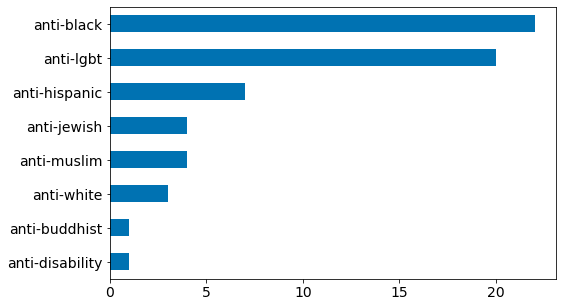

In [9]:
bias.sort_values().plot.barh(figsize=(8,5), 
                             fontsize=14)

As we can see, 32.81% of hate crimes, since 2017, occurred against the LGBT community. 

<a id='q2'></a>
### Question 2. How are offense types distributed during the course of a hate crime? 

Assault                22
Criminal Mischief       9
Simple Assault          8
Intimidation            7
Vandalism               4
Aggravated Assault      4
Destruction             2
Theft                   1
Robbery                 1
Burglary/Assault        1
Assault with Injury     1
Assault by Threat       1
Assault by Contact      1
Name: offense, dtype: int64

----------------------------------


Assault                0.354839
Criminal Mischief      0.145161
Simple Assault         0.129032
Intimidation           0.112903
Vandalism              0.064516
Aggravated Assault     0.064516
Destruction            0.032258
Theft                  0.016129
Robbery                0.016129
Burglary/Assault       0.016129
Assault with Injury    0.016129
Assault by Threat      0.016129
Assault by Contact     0.016129
Name: offense, dtype: float64

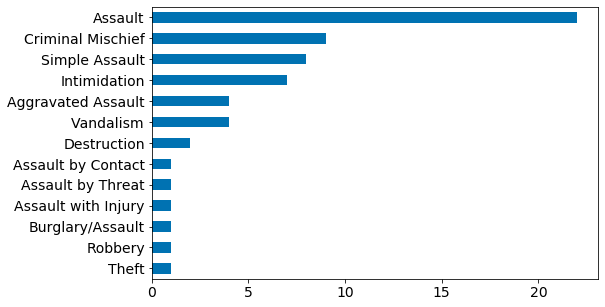

In [10]:
# Create a dataframe for the offense values
offense_count = df.offense.value_counts()
display(offense_count)

# Displaying the offense values as proportions
print('----------------------------------')
offense_count_pct = df.offense.value_counts(normalize=True)
display(offense_count_pct)

offense_count.sort_values().plot.barh(figsize=(8,5), 
                                      fontsize=14)

There are so many types of assault. I am unsure, legally speaking, what the difference is between all the assault variables. Definitely a question for further research. 

<a id='q3'></a>
### Question 3. What is the race/ethnicity of the offenders?      

white                    26
unknown                  15
hispanic                 14
black                     5
hispanic (2) white(2)     1
asian                     1
Name: race_ethn_offender, dtype: int64

----------------------------------


white                    0.419355
unknown                  0.241935
hispanic                 0.225806
black                    0.080645
hispanic (2) white(2)    0.016129
asian                    0.016129
Name: race_ethn_offender, dtype: float64

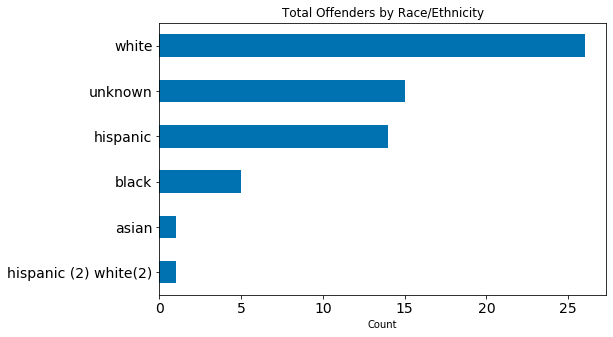

race_ethn_offender,asian,black,hispanic,hispanic (2) white(2),unknown,white
bias,,,,,,
anti-black,1,0,1,0,7,13
anti-buddhist,0,0,0,0,1,0
anti-disability,0,0,1,0,0,0
anti-hispanic,0,1,2,0,1,3
anti-jewish,0,0,0,0,3,1
anti-lgbt,0,2,8,1,3,6
anti-muslim,0,0,1,0,0,3
anti-white,0,2,1,0,0,0


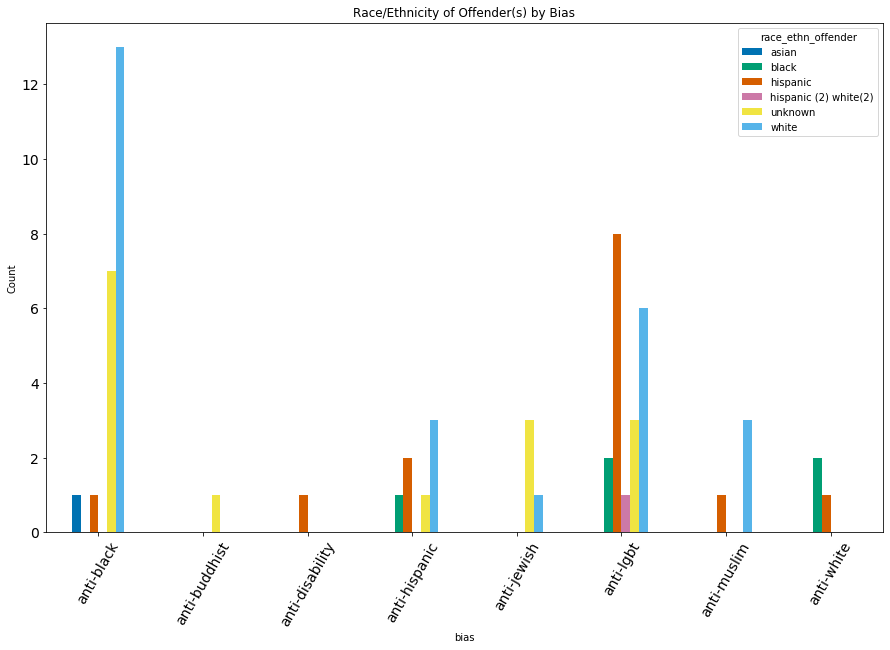

In [11]:
# Create a dataframe for the offender ethnicity values
offenders_count = df['race_ethn_offender'].value_counts()
display(offenders_count)
print('----------------------------------')

# Displaying the offender ethnicity values as proportions
offenders_count_pct = df['race_ethn_offender'].value_counts(normalize=True)
display(offenders_count_pct)

offenders_count.sort_values().plot.barh(figsize=(8,5), 
                                        fontsize=14)
plt.title('Total Offenders by Race/Ethnicity')
plt.xlabel('Count')
plt.show()

off_race_bias = pd.crosstab(df.bias, df.race_ethn_offender)
display(off_race_bias)

off_race_bias.plot.bar(figsize=(15,9.375), 
                       fontsize=14, 
                       rot=60)
plt.title('Race/Ethnicity of Offender(s) by Bias')
plt.ylabel('Count')
plt.show()

Note...the above result has an instance of 'Hispanic (2), Caucasian (2)' as a single offender because of an incident that occurred on 1/19/2019: https://www.statesman.com/news/20200124/confrontation-that-ignited-attack-on-austin-gay-couple-questioned-by-detective. Two of the offenders were white, and the other 2 were hispanic. 

So in actuality, of the total offenders, 44.44% were White, 22.22% were Hispanic, 7.94% were Black, and 1.59% (1 offender in total) were identified as Asian. 

It is interesting to note that, out of the total, 23.81% remains unidentified in terms of race and ethnicity. 

<a id='q4'></a>
### Question 4. At what kinds of locations in Austin do hate crimes take place? 

In [12]:
# Displaying 'offense location'
location = df.offense_location.value_counts()
display(location)
print('----------------------------------')

# Displaying 'offense location' as proportions
location_pct = df.offense_location.value_counts(normalize=True)
display(location_pct)

Residence/Home                        12
Streets/Highway/Road/Alley            10
Highway/Road/Alley/Street/Sidewalk     6
Bar/Nightclub                          5
Parking Lot/Garage                     5
Convenience Store                      4
Highway/Road/Street                    4
Parking Lot                            2
Park/Playground                        2
Department/Discount Store              1
Bank/Savings and Loan                  1
Church/Synagogue                       1
Church/Synagogue/Temple/Mosque         1
Hotel/Motel                            1
Drug Store/Dr.'s office/Hospital       1
Shelter-Mission/Homeless               1
Other/unknown                          1
Parking/Drop Lot                       1
Restaurant                             1
School-Elementary/Secondary            1
Air/Bus/Train Terminal                 1
Name: offense_location, dtype: int64

----------------------------------


Residence/Home                        0.193548
Streets/Highway/Road/Alley            0.161290
Highway/Road/Alley/Street/Sidewalk    0.096774
Bar/Nightclub                         0.080645
Parking Lot/Garage                    0.080645
Convenience Store                     0.064516
Highway/Road/Street                   0.064516
Parking Lot                           0.032258
Park/Playground                       0.032258
Department/Discount Store             0.016129
Bank/Savings and Loan                 0.016129
Church/Synagogue                      0.016129
Church/Synagogue/Temple/Mosque        0.016129
Hotel/Motel                           0.016129
Drug Store/Dr.'s office/Hospital      0.016129
Shelter-Mission/Homeless              0.016129
Other/unknown                         0.016129
Parking/Drop Lot                      0.016129
Restaurant                            0.016129
School-Elementary/Secondary           0.016129
Air/Bus/Train Terminal                0.016129
Name: offense

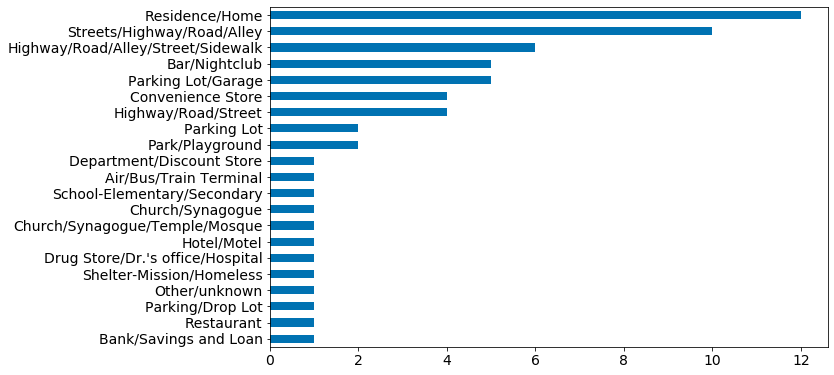

In [13]:
location.sort_values().plot.barh(figsize=(10,6.25), 
                                 fontsize=14)

It's interesting that 20% of the instances occurred within a residence/home. 

As a final look, let's examine the correlations between victims and offenders. 

<a id='q5'></a>
### Correlations between offenders and victims

,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18
number_of_offenders_over_18,1.000000,-0.174610,0.438571,-0.016937
number_of_offenders_under_18,-0.174610,1.000000,-0.386583,0.574846
number_of_victims_over_18,0.438571,-0.386583,1.000000,-0.532162
number_of_victims_under_18,-0.016937,0.574846,-0.532162,1.000000


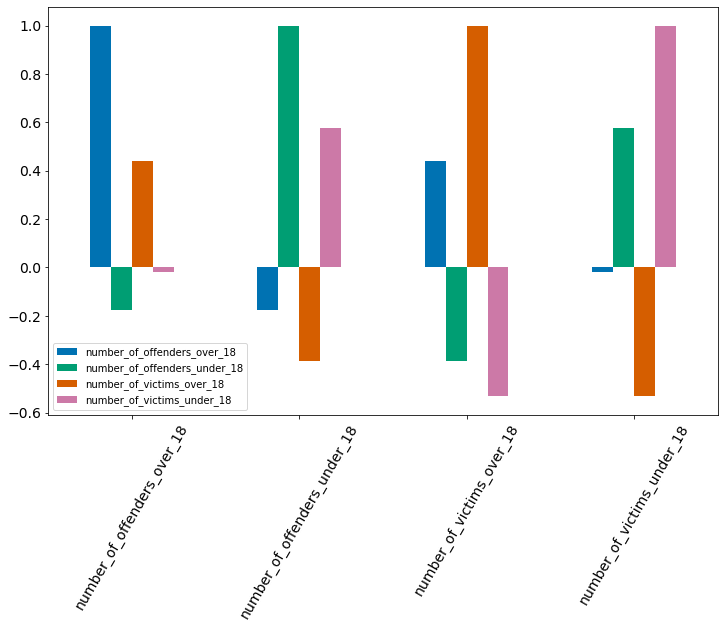

In [14]:
# Examining correlations between victims & offenders
df_corr = df.corr()
display(df_corr)
df_corr.plot.bar(rot=60, 
                 fontsize=14,  
                 figsize=(12,7.5))